1. **Box Plot:**
   Box plot adalah salah satu jenis grafik statistik yang digunakan untuk menampilkan distribusi data numerik melalui quartil. Box plot secara visual menunjukkan letak dari quartil pertama (Q1), median (nilai tengah), dan quartil ketiga (Q3). Selain itu, box plot juga menampilkan rentang antarkuartil (IQR), yang didefinisikan sebagai selisih antara Q3 dan Q1. Di dalam box plot, juga bisa terdapat pencilan (outlier) yang merupakan data yang berada jauh dari nilai median atau keluar dari batas yang ditentukan. Pencilan biasanya ditampilkan sebagai titik-titik di luar garis whisker pada box plot.

2. **Mendapatkan Data Twitter untuk Analisis:**
   Untuk mendapatkan data Twitter untuk analisis, Anda bisa menggunakan Twitter API. Langkah-langkahnya sebagai berikut:
   - Buatlah akun pengembang di Twitter Developer Platform dan buat aplikasi baru.
   - Setelah itu, dapatkan kunci API dan token akses yang diperlukan untuk mengautentikasi permintaan API.
   - Gunakan library Python seperti Tweepy untuk berinteraksi dengan Twitter API. Tweepy menyediakan antarmuka yang mudah digunakan untuk mengirim permintaan dan menerima respons dari Twitter API.
   - Anda dapat mengambil data dari Twitter dengan melakukan pencarian berdasarkan kata kunci, username, tanggal, dan banyak lagi.
   - Setelah mendapatkan data, Anda dapat menyimpannya dalam format yang sesuai (misalnya, CSV atau dataframe) untuk kemudian dianalisis menggunakan alat analisis data seperti pandas, scikit-learn, atau menggunakan teknik pemrosesan bahasa alami (NLP) untuk analisis teks.

In [7]:
import pandas as pd
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tweets_biden = pd.read_csv("/content/drive/My Drive/NLP/tweets_en_biden.csv",
                           lineterminator='\n',
                           parse_dates = True)
tweets_trump = pd.read_csv("/content/drive/My Drive/NLP/tweets_en_trump.csv",
                           lineterminator='\n',
                           parse_dates = True)

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

tweets_biden['text_clean'] = tweets_biden['tweet'].apply(lambda x: remove_punct(x))
tweets_trump['text_clean'] = tweets_trump['tweet'].apply(lambda x: remove_punct(x))

tweets_biden.head()


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...


In [14]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

tweets_biden['text_tokenized'] = tweets_biden['text_clean'].apply(lambda x: tokenize(x.lower()))
tweets_trump['text_tokenized'] = tweets_trump['text_clean'].apply(lambda x: tokenize(x.lower()))

tweets_biden.head()


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ..."
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins..."


In [15]:
def short_long(text):
    filtered_text = [word for word in text if (len(word) > 2 and len(word) < 12)]
    return filtered_text

tweets_biden['no_long_short'] = tweets_biden['text_tokenized'].apply(lambda x: short_long(x))
tweets_trump['no_long_short'] = tweets_trump['text_tokenized'].apply(lambda x: short_long(x))

tweets_biden.head()


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult..."


In [16]:
def remove_http(text):
    text = [word for word in text if 'http' not in word]
    return text

tweets_biden['no_http'] = tweets_biden['no_long_short'].apply(lambda x: remove_http(x))
tweets_trump['no_http'] = tweets_trump['no_long_short'].apply(lambda x: remove_http(x))

tweets_biden.head()


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult..."


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import nltk
from nltk.corpus import stopwords

# Inisialisasi stopwords
nltk.download('stopwords')
stopwords_english = stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_english]
    return text

tweets_biden['text_nostop'] = tweets_biden['no_http'].apply(lambda x: remove_stopwords(x))
tweets_trump['text_nostop'] = tweets_trump['no_http'].apply(lambda x: remove_stopwords(x))

tweets_biden.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b..."


In [22]:
import nltk
nltk.download('omw')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets_biden['text_lemmatized'] = tweets_biden['text_nostop'].apply(lambda x: lemmatizing(x))
tweets_trump['text_lemmatized'] = tweets_trump['text_nostop'].apply(lambda x: lemmatizing(x))

tweets_biden.head()


[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop,text_lemmatized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is...","[effort, find, truth, allegation, twitter, isn..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el...","[twitter, everything, help, democrat, win, ele..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b...","[joebiden, call, lier, insult, overweight, bid..."


In [24]:
tweets_biden.to_csv('tweets_en_biden_lemm.csv')
tweets_trump.to_csv('tweets_en_trump_lemm.csv')

In [25]:
tweets_biden = pd.read_csv('tweets_en_biden_lemm.csv', lineterminator='\n', parse_dates=True)
tweets_trump = pd.read_csv('tweets_en_trump_lemm.csv', lineterminator='\n', parse_dates=True)

In [26]:
biden = tweets_biden.loc[tweets_biden['country'] == 'United States of America']['text_lemmatized']
trump = tweets_trump.loc[tweets_trump['country'] == 'United States of America']['text_lemmatized']

In [27]:
biden

0                          ['meidastouch', 'biden', 'made']
1         ['censorship', 'hunterbiden', 'biden', 'bidene...
2         ['effort', 'find', 'truth', 'allegation', 'twi...
3         ['twitter', 'everything', 'help', 'democrat', ...
4         ['joebiden', 'call', 'lier', 'insult', 'overwe...
                                ...                        
120257     ['biden', 'image', 'santa', 'maria', 'joebiden']
120258              ['become', 'ubiquitous', 'bidenharris']
120259                          ['moving', 'near', 'biden']
120260    ['flotus', 'excited', 'flotus', 'whose', 'vagi...
120261                  ['man', 'need', 'helpusa', 'biden']
Name: text_lemmatized, Length: 120262, dtype: object

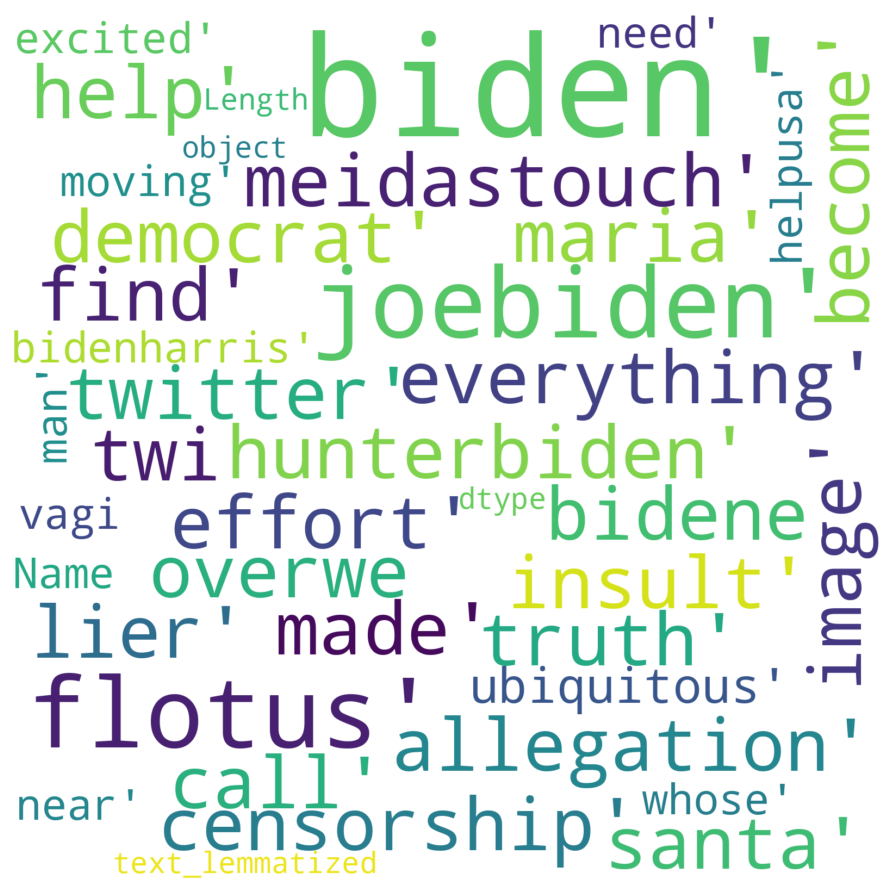

In [28]:
# Install wordcloud jika belum terinstal
!pip install wordcloud

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.subplots(1,1, figsize=(9,9))

wc_b = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=50, max_font_size=256, random_state=42, width=1600, height=1600)
wc_b.generate(str(biden.dropna()))

plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()  # Menambahkan fungsi tight_layout untuk memastikan layout yang lebih baik
plt.show()


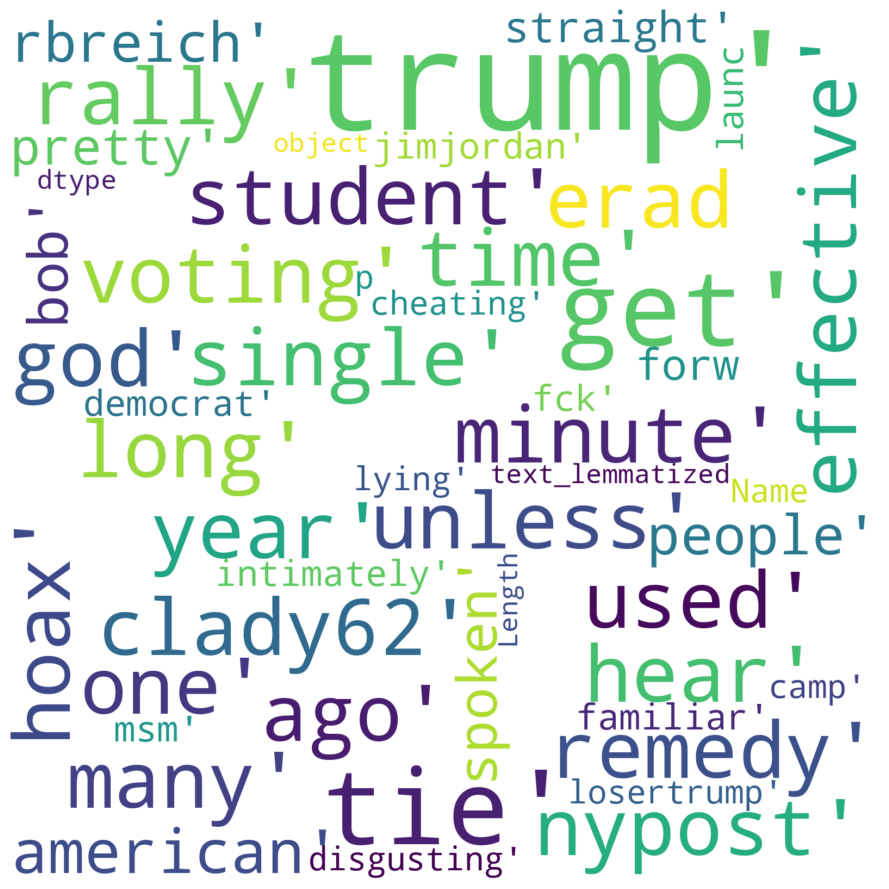

In [29]:
import matplotlib.pyplot as plt

plt.subplots(1, 1, figsize=(9, 9))

wc_b = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=50, max_font_size=256, random_state=42, width=1600, height=1600)
wc_b.generate(str(trump.dropna()))

plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()  # Menambahkan fungsi tight_layout untuk memastikan layout yang lebih baik
plt.show()


In [30]:
text_biden = tweets_biden['text_clean']
text_trump = tweets_trump['text_clean']

In [31]:
import unicodedata
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')

def clean1(sent):
    filtered_sent = ""
    stopwords = nltk.corpus.stopwords.words('english')
    sent = (unicodedata.normalize('NFKD', sent)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    sent = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]', '', sent)
    words = sent.split()
    for word in words:
        if word not in stopwords:
            filtered_sent = filtered_sent + ' ' + word
    return filtered_sent.strip()

def clean2(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Pastikan text_biden dan text_trump adalah variabel yang sudah didefinisikan sebelumnya
words_biden = clean2(''.join(str(text_biden.apply(clean1).tolist())))
words_trump = clean2(''.join(str(text_trump.apply(clean1).tolist())))

words_biden[:10]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'biden',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'biden',
 'bidenemails']

In [32]:
words_biden2 = [i for i in words_biden if i not in ['trump', 'donald', 'biden', 'joe', 'joebiden', 'donaldtrump', 'election', 'vote', 'u', 'win', 'like', 'amp']]
words_trump2 = [i for i in words_trump if i not in ['trump', 'donald', 'biden', 'joe', 'joebiden', 'donaldtrump', 'election', 'vote', 'u', 'win', 'like', 'amp']]

biden_2ngrams = (pd.Series(nltk.ngrams(words_biden2, 2)).value_counts())[:10]
trump_2ngrams = (pd.Series(nltk.ngrams(words_trump2, 2)).value_counts())[:10]
biden_3ngrams = (pd.Series(nltk.ngrams(words_biden2, 3)).value_counts())[:10]
trump_3ngrams = (pd.Series(nltk.ngrams(words_trump2, 3)).value_counts())[:10]

biden_ngrams = pd.concat([biden_2ngrams, biden_3ngrams])
trump_ngrams = pd.concat([trump_2ngrams, trump_3ngrams])


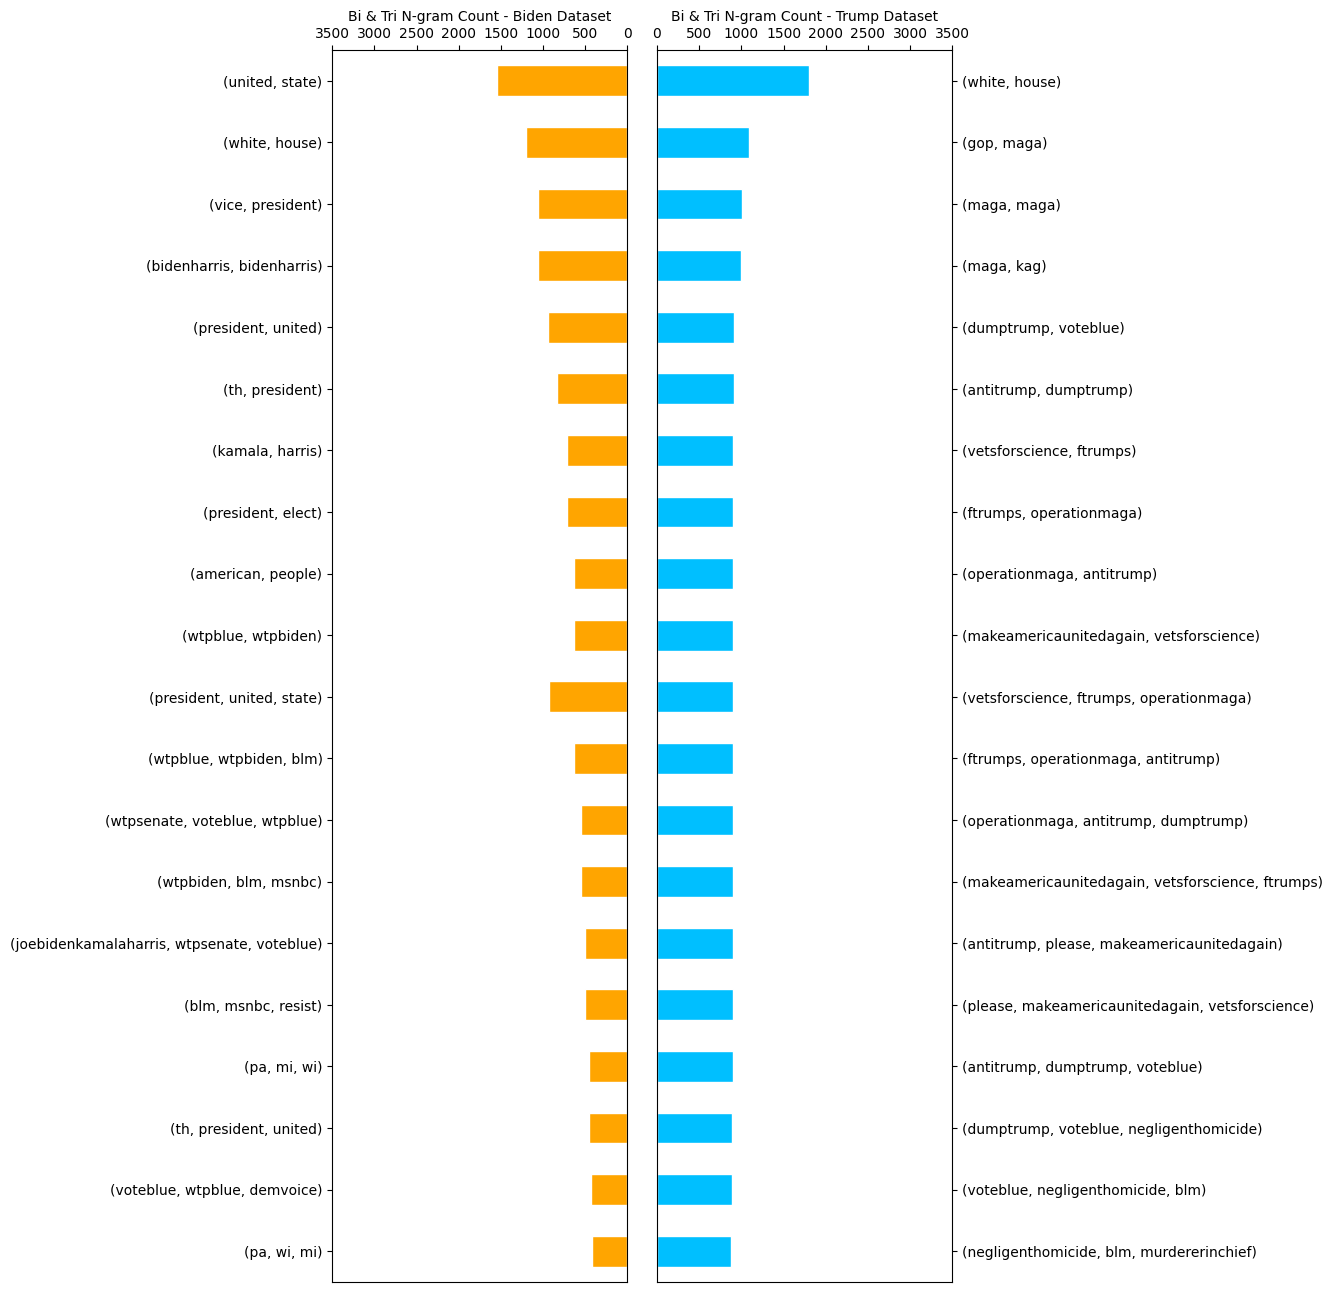

In [33]:
barcolors = ['olivedrap', 'mediumslateblue', 'lightpink', 'orange', 'lightcoral', 'palegreen', 'deepskyblue', 'grey']
barstyle = {"edgecolor": "white", "linewidth": 1}

fig, ax = plt.subplots(1, 2, figsize=(8, 16), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1, 'hspace': 0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3], **barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6], **barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')

plt.show()


In [34]:
tweets_biden_blob = tweets_biden['text_clean'].to_frame()
tweets_trump_blob = tweets_trump['text_clean'].to_frame()

tweets_biden_blob.head()


,text_clean
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,censorship HunterBiden Biden BidenEmails Biden...
2,In an effort to find the truth about allegatio...
3,Twitter is doing everything they can to help D...
4,JoeBiden calls him a lier and then insults him...


In [35]:
!pip install textblob

from textblob import TextBlob

tweets_biden_blob['polarity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_biden_blob['subjectivity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
biden_blob = tweets_biden_blob.sample(1000)

tweets_trump_blob['polarity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_trump_blob['subjectivity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trump_blob = tweets_trump_blob.sample(1000)

trump_blob.head()


,text_clean,polarity,subjectivity
103434,FCBonanno FriedrichdAnco NBCConnecticut Trump ...,0.5,0.9000
69097,realDonaldTrump Trump Dont forget your Tshirt ...,0.0,0.0000
72710,News\nTrump2020\nTrump\nhttpstcoq2fpnNQmXL,0.0,0.0000
29862,Faced with a dire COVID diagnosis how do patie...,0.0,0.5000
57683,Latest comic panel on Patreon Someday were goi...,0.4,0.6375


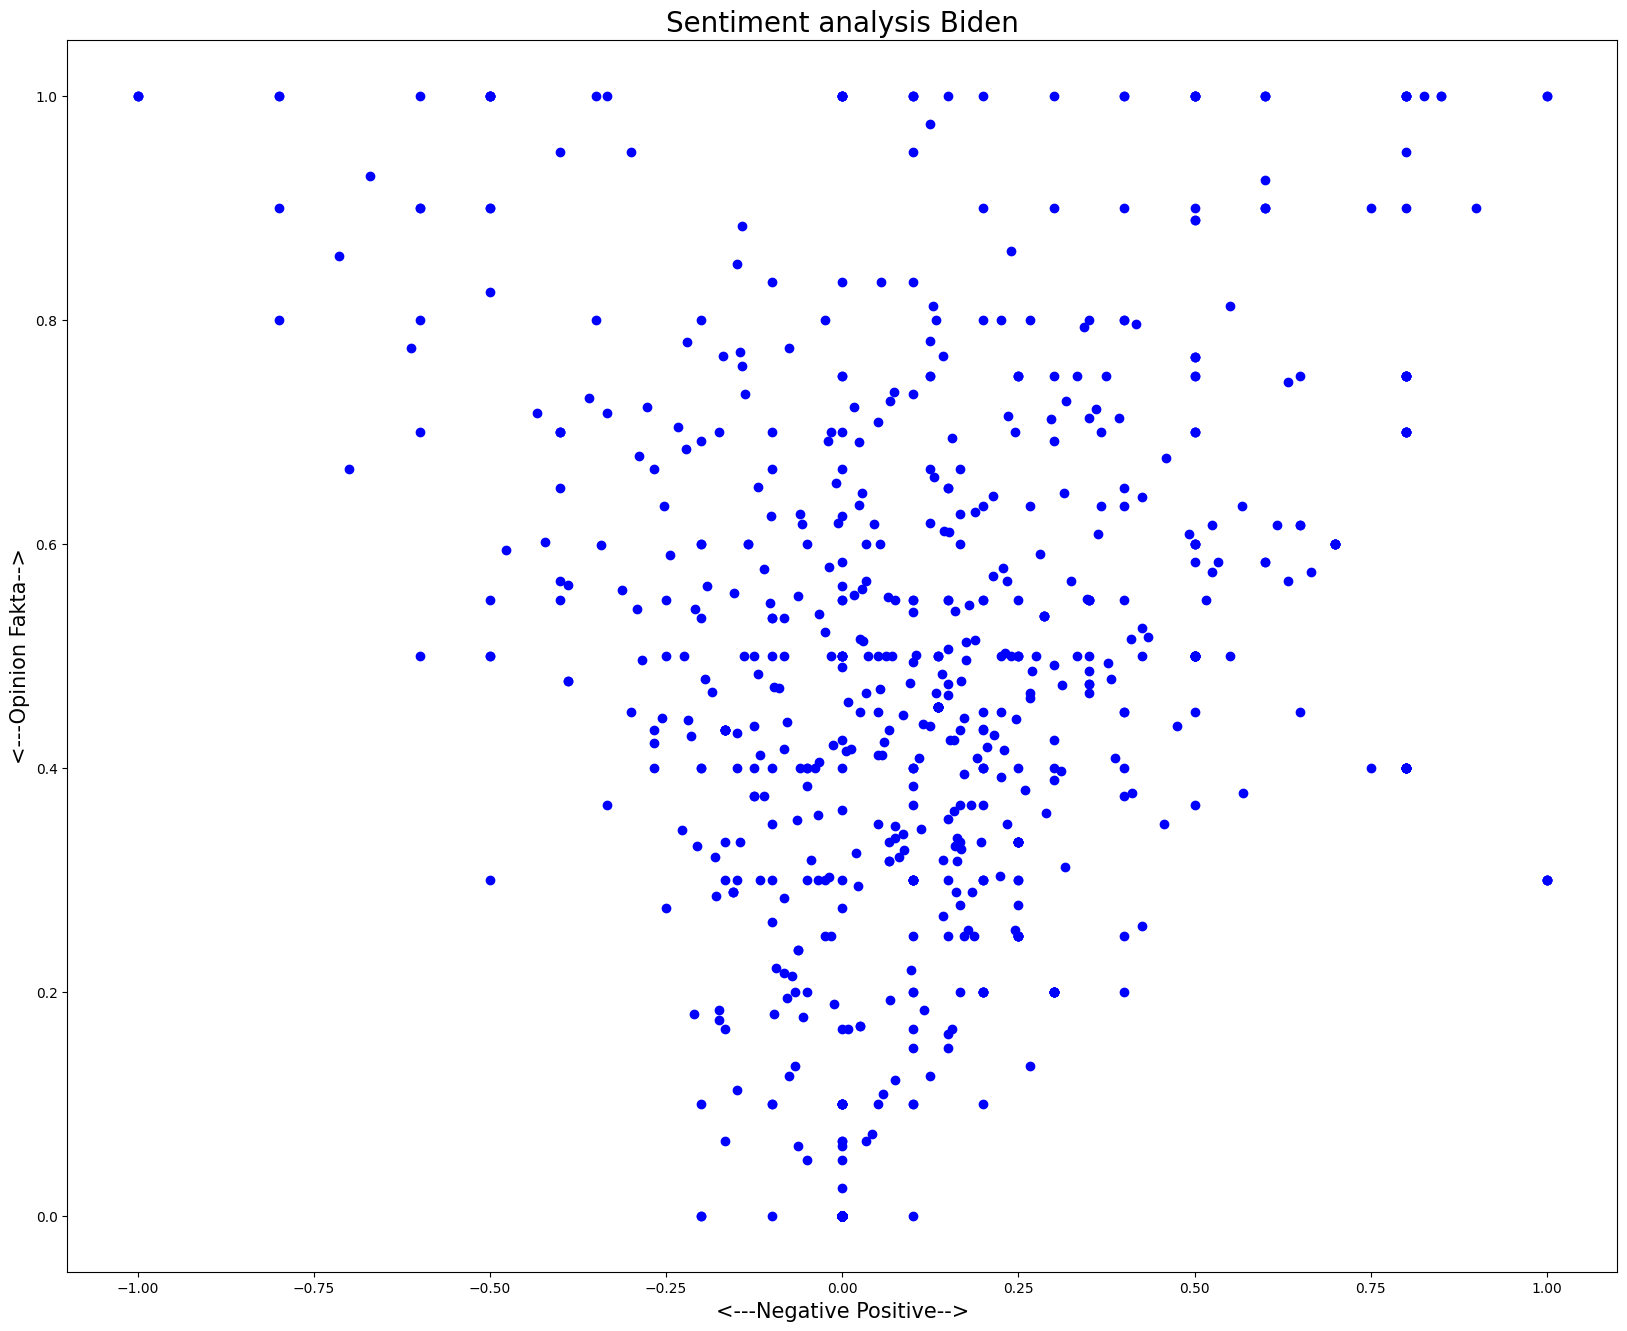

In [36]:
plt.figure(figsize=[20, 16])
for index, row in enumerate(biden_blob.index):
    x = biden_blob.polarity.loc[row]
    y = biden_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='blue')

plt.title('Sentiment analysis Biden', fontsize=20)
plt.xlabel('<---Negative Positive-->', fontsize=15)
plt.ylabel('<---Opinion Fakta-->', fontsize=15)
plt.show()


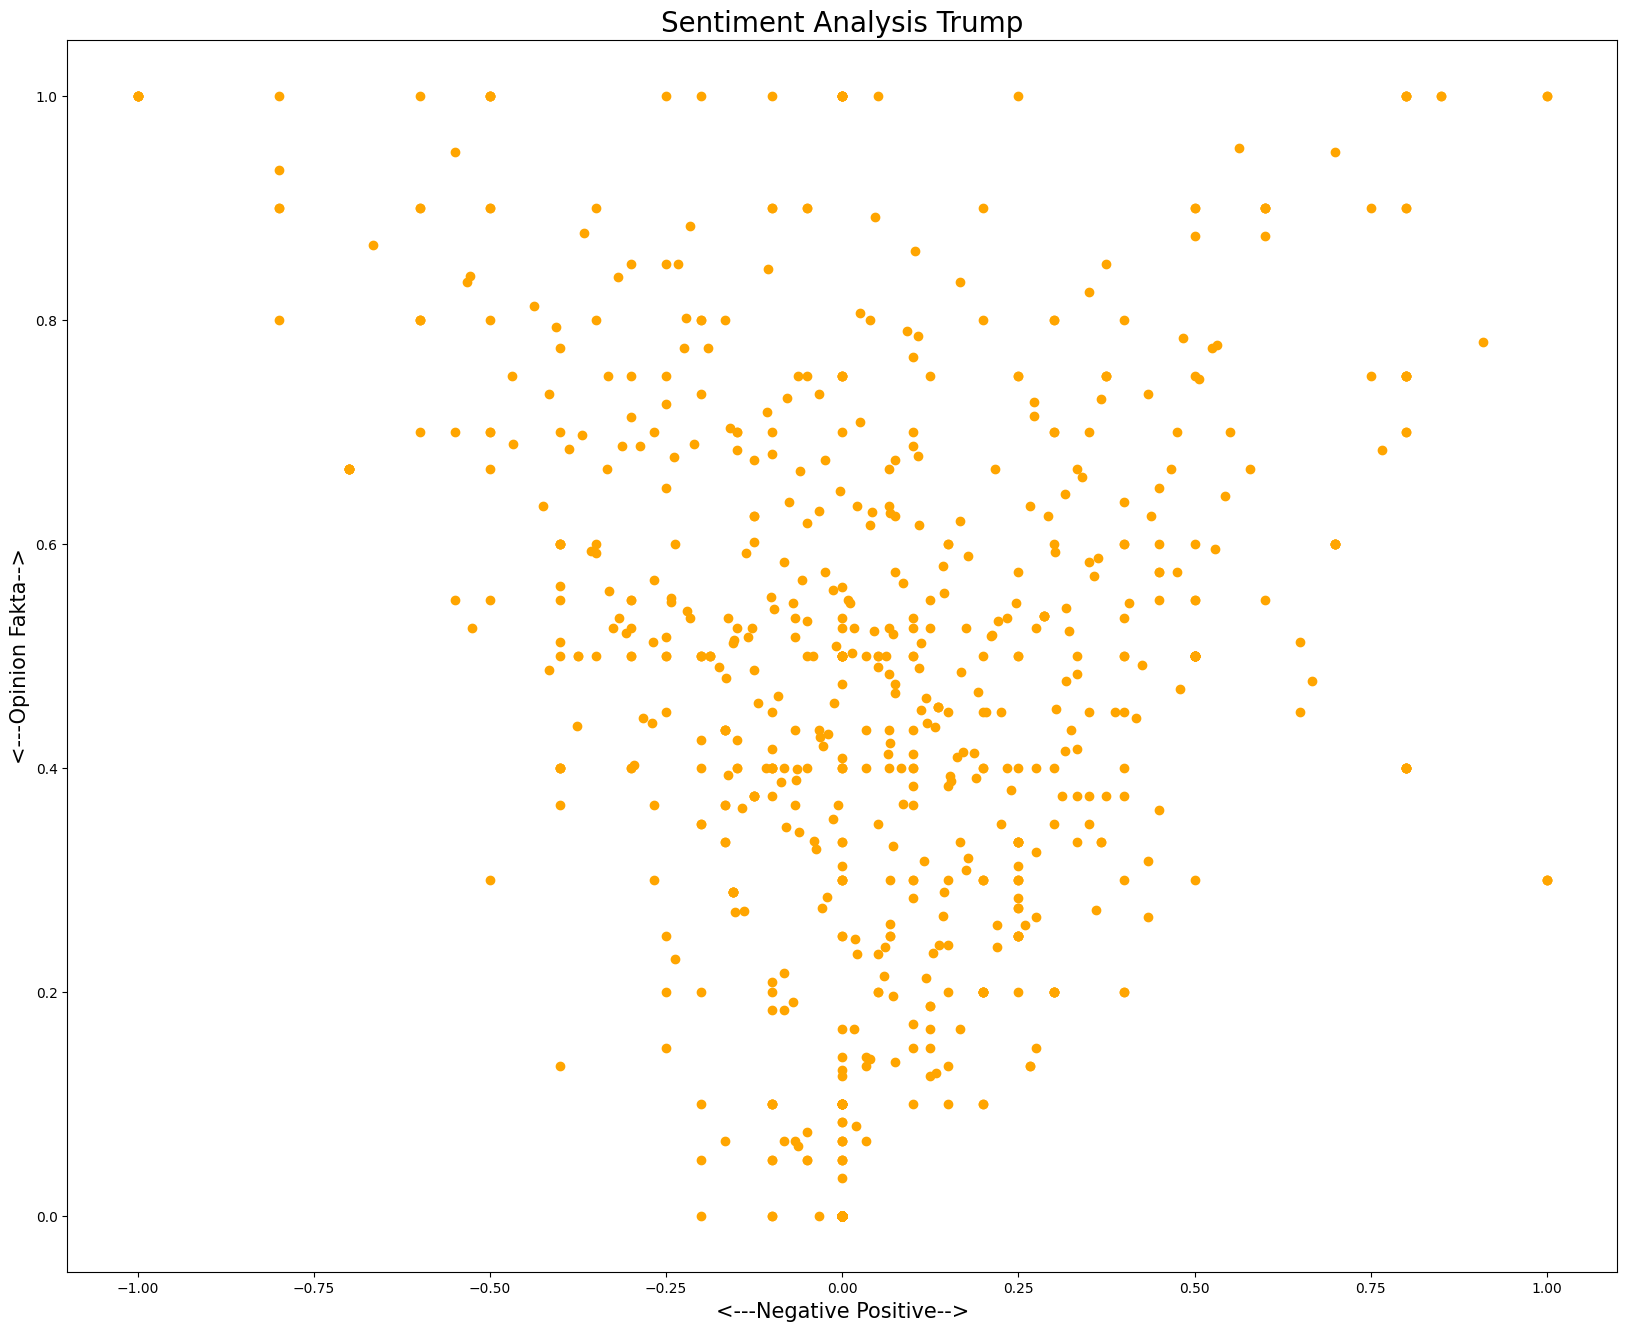

In [37]:
plt.figure(figsize=[20, 16])
for index, row in enumerate(trump_blob.index):
    x = trump_blob.polarity.loc[row]
    y = trump_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='orange')

plt.title('Sentiment Analysis Trump', fontsize=20)
plt.xlabel('<---Negative Positive-->', fontsize=15)
plt.ylabel('<---Opinion Fakta-->', fontsize=15)
plt.show()


<Axes: title={'center': 'Boxplot subjectivitas Biden'}>

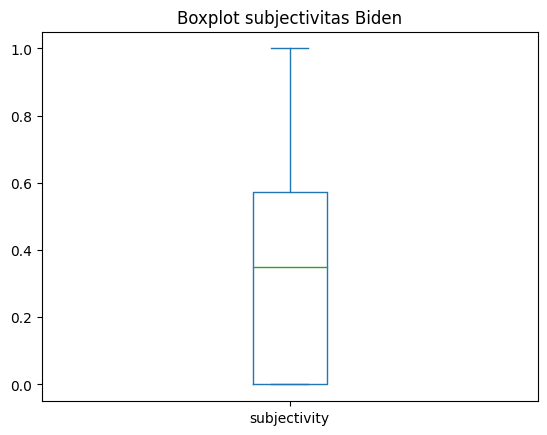

In [38]:
tweets_biden_blob.subjectivity.plot.box(title='Boxplot subjectivitas Biden')

<Axes: title={'center': 'Boxplot subjectivitas trump'}>

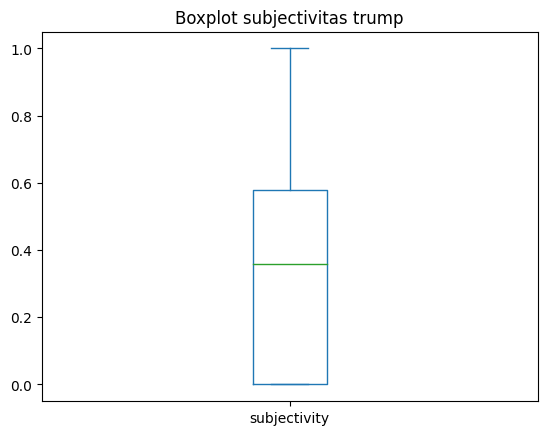

In [39]:
tweets_trump_blob.subjectivity.plot.box(title='Boxplot subjectivitas trump')

<Axes: title={'center': 'bOXPLOT Sentiment/Polarity Biden'}>

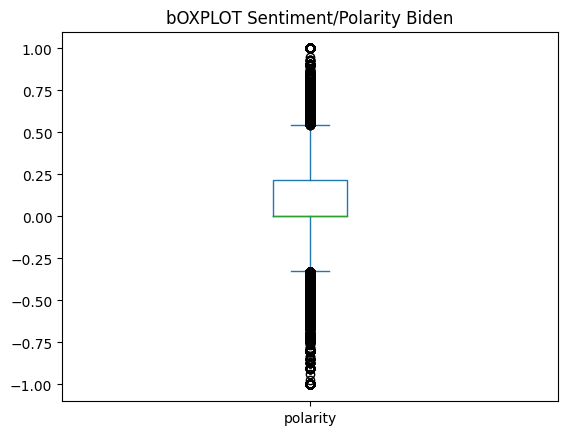

In [40]:
tweets_biden_blob.polarity.plot.box(title='bOXPLOT Sentiment/Polarity Biden')

<Axes: title={'center': 'Boxplot sentimet/polarity trump'}>

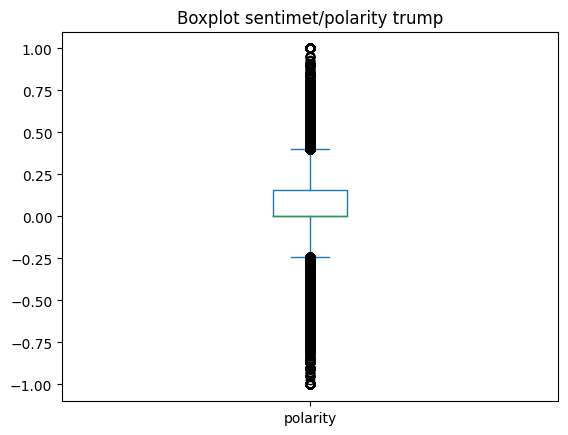

In [41]:
tweets_trump_blob.polarity.plot.box(title='Boxplot sentimet/polarity trump')

In [42]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

tweets_biden_blob['analysis'] = tweets_biden_blob['polarity'].apply(getAnalysis)
tweets_trump_blob['analysis'] = tweets_trump_blob['polarity'].apply(getAnalysis)
tweets_biden_blob.head()


,text_clean,polarity,subjectivity,analysis
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...,0.00,0.000000,neutral
1,censorship HunterBiden Biden BidenEmails Biden...,0.00,0.000000,neutral
2,In an effort to find the truth about allegatio...,0.00,0.000000,neutral
3,Twitter is doing everything they can to help D...,0.14,0.617778,positive
4,JoeBiden calls him a lier and then insults him...,0.00,0.150000,neutral


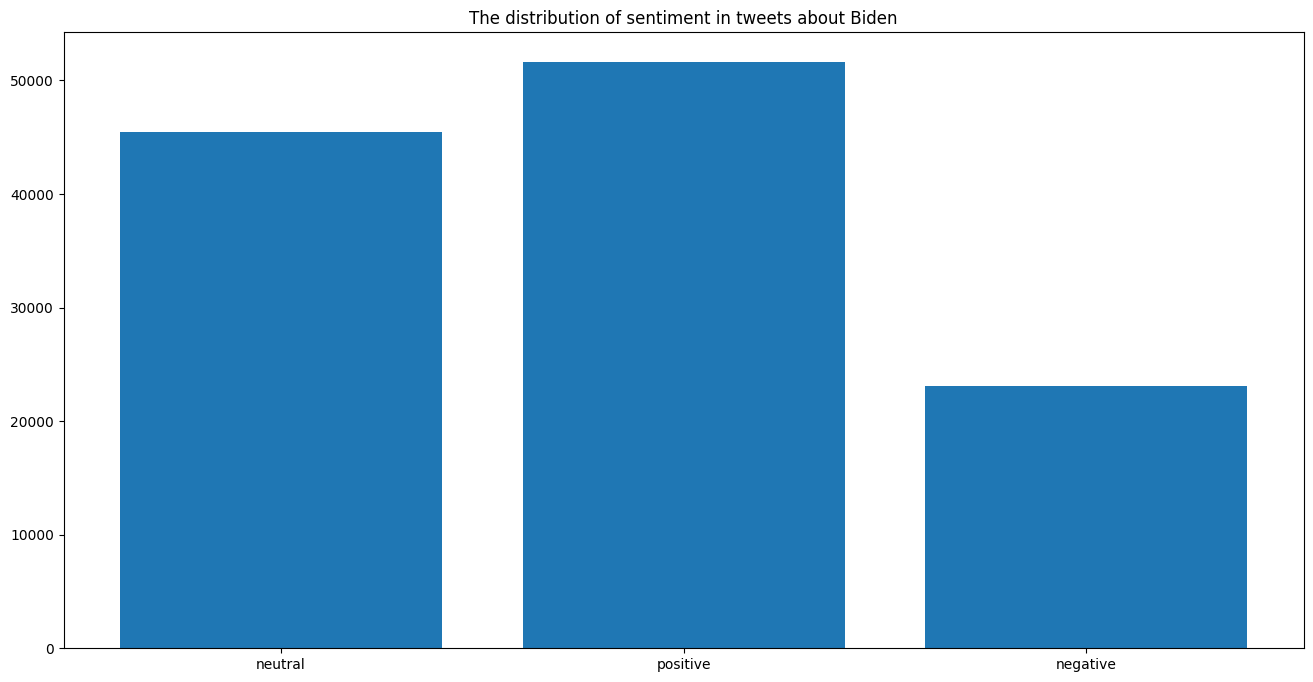

In [44]:
from collections import Counter

target_biden = Counter(tweets_biden_blob.analysis)

plt.figure(figsize=(16, 8))
plt.bar(target_biden.keys(), target_biden.values())
plt.title("The distribution of sentiment in tweets about Biden")
plt.show()


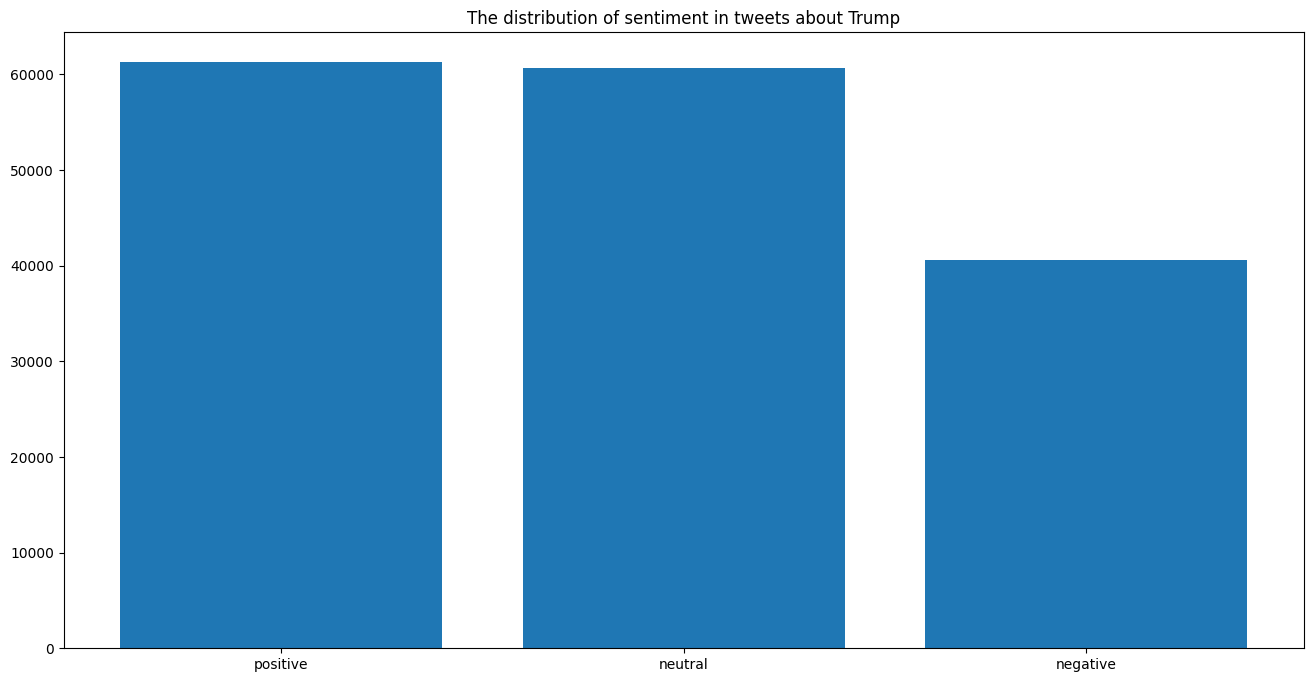

In [46]:
from collections import Counter

target_trump = Counter(tweets_trump_blob.analysis)

plt.figure(figsize=(16, 8))
plt.bar(target_trump.keys(), target_trump.values())
plt.title("The distribution of sentiment in tweets about Trump")
plt.show()
